In [113]:
import matplotlib.pyplot as plt
import numpy as np 
from math import sqrt 
from math import floor
from math import ceil
import pickle

In [23]:
def filter_conformations(saws ): 
    """Функция получает на вход список блужданий на плоскости, в котором каждое блуждание представлено списком из координат - кортежом.
    Осуществляет перебор списка. Вызывает функцию distance_between_saws.
    Возвращает список блужданий без повторения конформаций."""
    result = []
    result.append(saws[0])
    #result = [saws[0]]
    for i in range (1, len(saws)):
        if(i%100==0):
            print(i, end= " ")
        k=0
        for conformation in result:
            if(  distance_between_saws(conformation, saws[i] )== 0):
                k=-1
                break;
        if(k==-1):
            continue
        else:
            #if(saws[i])
            result.append(saws[i])
    return result 

In [16]:
def vector_for_distance(saw):
    """Принимает на вход конформацию(блуждание) на плоскости - список координат(кортежей).
    Возвращает вектор, описывающий данную конформацию, согласно [1]"""
    result = []
    left = [[(0,1), (-1, 0)] , [(1, 0), (0, 1)], [(0, -1), (1, 0)], [(-1, 0), (0, -1)] ]
    right = [ [(1, 0), (0, -1)], [(0,1), (1, 0)],  [(-1, 0), (0, 1)],  [(0, -1), (-1, 0)]  ]
    for i in range(2, len(saw)):
        steps = []
        dx = saw[i-1][0] - saw[i-2][0]
        dy =  saw[i-1][1] - saw[i-2][1]
        steps.append((dx, dy))
        dx = saw[i][0] - saw[i-1][0]
        dy =  saw[i][1] - saw[i-1][1]
        steps.append((dx, dy))
        if(saw[i][0] == saw[i-1][0] and saw[i-1][0]==saw[i-2][0] or saw[i][1] == saw[i-1][1] and saw[i-1][1]==saw[i-2][1]):
            result.append(0)
        elif (steps in left):
            result.append(-1)
        else:
            result.append(1)
    return result 

In [20]:
def distance_between_saws(saw1, saw2):
    """Принимает на вход два блуждания(конформации) на плоскости и возвращает целое число - расстояние между ними согласно метрике, описанной в [1].
    Вызывает функцию vector_for_distance для каждого переданного блуждания"""
    v1 = 0
    v2 = 0
    v_minus = []
    v_plus = [] 
    s1 =  vector_for_distance(saw1)
    s2= vector_for_distance(saw2)
    for i in range(len(s1)):
        v1=v1+ abs( s1[i]-s2[i])
        v2=v2+ abs( s1[i]+s2[i])
    #print(saw1, " ", s1)
    #print(saw2, " ", s2)
    #print(min(v1, v2))
    return min(v1, v2)

In [22]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def get_all_conformations(length):
    """Создает список конформаций на плоскости.  Функция принимает один аргумент - длину (число остатков).
    Возвращает список блужданий, в котором каждое блуждание представлено списком из координат"""
    if(length==3):
        return [[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1)]]
    else:
        result = get_all_conformations(length-1)
        new_conformations = [] 
        for i in range(len(result)):
            #print(i, end = "\n")
            for step in steps:
                new_point = (result[i][-1][0]+step[0], result[i][-1][1]+step[1] )
                if new_point in result[i]:
                    #print("the same ", new_point)
                    continue
                temp = result[i].copy()
                temp.append(new_point)
                new_conformations.append(temp)
        #print(length, " new  result is  ", new_conformations )
    filtered = filter_conformations(new_conformations)
    #print("after filter ", filtered)
    return filtered

In [136]:
q = get_all_conformations(10)
print(len(q))

100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2034


Для длины 10 получается 2034 конформации. Точно такой же результат описан в [1]

In [59]:
with open('out.pickle', 'wb') as f:
    pickle.dump(q, f)

In [8]:
number_of_conformations=[]
for i in range(3, 11):
    c = get_all_conformations(i)
    number_of_conformations.append(len(c))
    print(i, " finished", end = " ")

3  finished 4  finished 5  finished 6  finished 7  finished 100 200 8  finished 100 200 100 200 300 400 500 600 700 9  finished 100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 10  finished 

In [31]:
approximate = []
two =[]
for i in range(3, 11):
    approximate.append(2.718**(i-1))
    two.append(2**i)

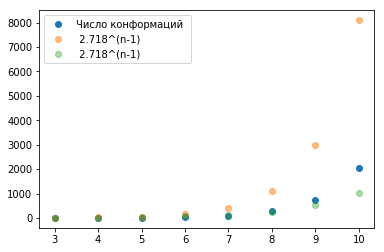

In [36]:
plt.plot(range(3, 11), number_of_conformations, 'o', label = "Число конформаций ")
plt.plot(range(3, 11), approximate, 'o', label = " 2.718^(n-1) ", alpha = 0.5)
plt.plot(range(3, 11), two, 'o', label = " 2.718^(n-1) ", alpha=0.4)
plt.legend(loc='best')

Число конформаций (блужданий без самопересечений) растет экспоненциально. Это также показывается во второй главе [2]

In [24]:
def end_to_end_distance(path):
    """Евклидова метрика"""
    distance = sqrt((path[-1][0]-path[0][0])**2+(path[-1][1]-path[0][1])**2)     
    return distance 

In [109]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def calculate_contacts(saw):
    """Функция принимает на вход конформацию на плоскости(список координат). 
    Возвращает число топологических соседей для нее """
    k=0
    for i in range(1, len(saw)-1):
        not_topological=[saw[i-1], saw[i+1]]
        for step in steps:
            new_point = (saw[i][0]+step[0], saw[i][1]+step[1] )
            if (new_point in saw and (new_point not in not_topological)):
                k=k+1
    for step in steps:
        new_point_begin = (saw[0][0]+step[0], saw[0][1]+step[1] )
        new_point_end= ( saw[-1][0]+step[0], saw[-1][1]+step[1])
        if(new_point_begin in saw and new_point_begin!=saw[1]):
            k=k+1
        if( new_point_end in saw and new_point_end!=saw[-2]    ):
            k=k+1
        
        
    return k//2
        

In [110]:
e=22
q[e]

[(0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (0, 1), (0, 2)]

In [111]:
calculate_contacts(q[e])

2

In [147]:
def count_saws_contact(saws):
    """Функция принимает список блужданий на плоскости. Возвращает словарь, в котором ключ - число топологических соседей,
    а значение - число таких конформаций.
    Максимальное число топологических соседей находится по формуле из [1]"""
    n=len(saws[0])
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    print(n, " ", m, " ", m_1)
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max)
    print(t_max)
    counts ={}
    for i in range(t_max+1):
        counts.update({i :0})
    for saw in saws:
        e=calculate_contacts(saw)
        counts[e]=counts[e]+1
    return counts

In [145]:
d = count_saws_contact(q)
print(d)

10   3   4
4
{0: 666, 1: 672, 2: 425, 3: 173, 4: 98}


666 + 672 + 425 + 173 + 98 = 2034

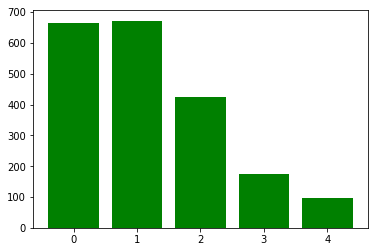

In [146]:
plt.bar(list(d.keys()), d.values(), color='g')
plt.show()

Гистограмма показывает, сколько существует различных конформаций для данного числа топологических соседей. 
Я сравнила эту гистаграмма с гистограммой из статьи (там она показана для последовательности из H), все нормально 

# References

1) A Lattice Statistical Mechanics Model of the Conformational and Sequence Spaces of Proteins, Kit Fun Lau and Ken A. Dill, Macromolecules 1989 

2) Lattice Models of Polymers, Carlo Vanderzande, 2008